# pyradon package demo

Start by importing the simulator module and making a simulator object

In [3]:
from pyradon.simulator import Simulator

s = Simulator()
s.debug_bit = 2


Now let us give the simulator some start and end points. 

In [4]:
s.x1 = 0.375; s.x2 = 0.5; s.y1 = 0; s.y2 = 0.5;
s.run()

SIMULATED : S/N= 61.01 | I= 10.00 | L= 263.9 | th= 75.96 | x0= 192.00
CALCULATED: S/N= 57.10 | I= 9.36 | L= 263.9 | th= 75.96 | x0= 192.00 


Looks like it finds the correct coordinates. Lets show it. 

<IPython.core.display.Javascript object>


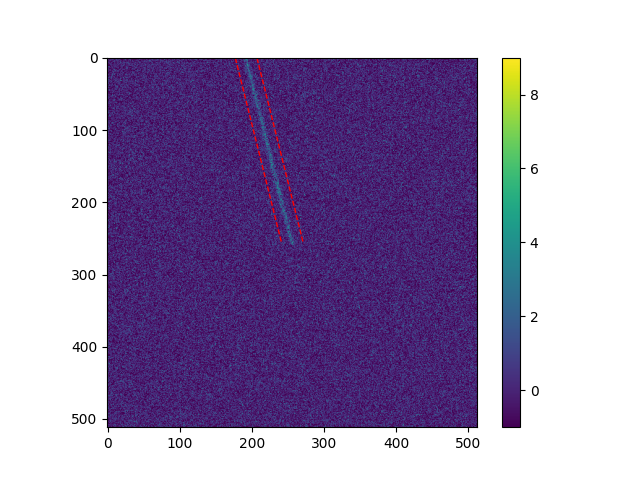

In [6]:
import matplotlib.pyplot as plt

%matplotlib notebook
streak = s.finder.streaks[0]
offset = 15
plt.figure()
plt.imshow(s.image)
plt.plot([streak.x1-offset, streak.x2-offset], [streak.y1,streak.y2], lw=1, ls='--', color='red')
plt.plot([streak.x1+offset, streak.x2+offset], [streak.y1,streak.y2], lw=1, ls='--', color='red')
plt.colorbar()
plt.show()

What if we have an external image? First we generate it from the Simulator (but it can be a real image)

In [7]:
s.x1 = 0.2; s.x2 = 0.6; s.y1 = 0; s.y2 = 0.5; s.run()

SIMULATED : S/N= 68.00 | I= 10.00 | L= 327.8 | th= 51.34 | x0= 102.40
CALCULATED: S/N= 63.87 | I= 9.39 | L= 328.0 | th= 51.31 | x0= 102.00 


Lets create some images from the noiseless "image_conv" in the Simulator.

<IPython.core.display.Javascript object>


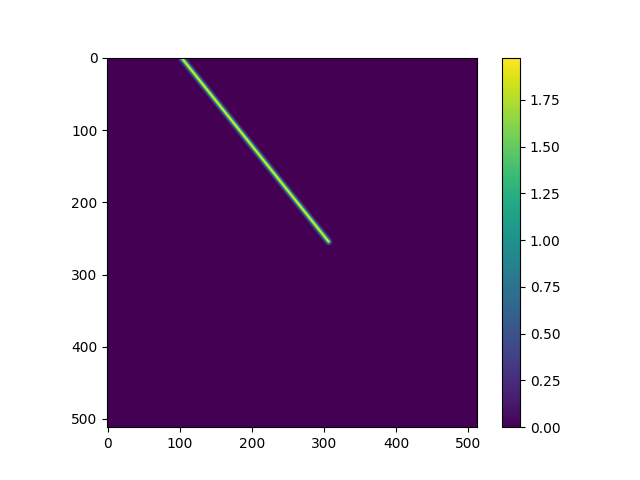

In [8]:
plt.figure()
plt.imshow(s.image_clean)
plt.colorbar();

In [10]:
import numpy as np
I = np.random.normal(103, 2.5, (10,512,512))
I[2,:,:] = I[2,:,:] + s.image_clean

<IPython.core.display.Javascript object>


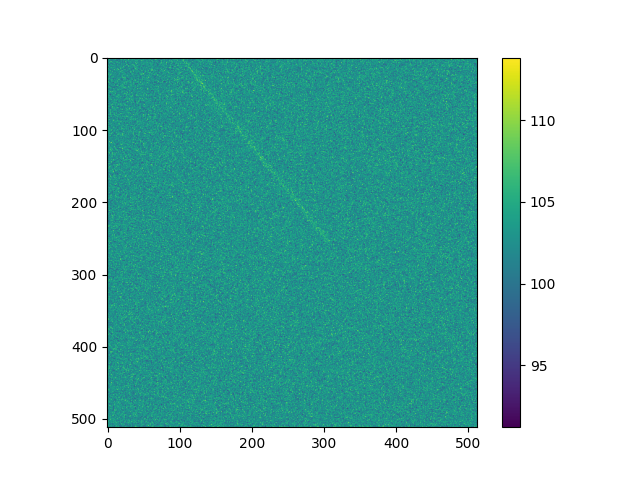

In [11]:
plt.figure()
plt.imshow(I[2,:,:])
plt.colorbar();

We now have 10 noisy images with the line in image number 3.
Now lets put these images into the streak finder:

In [22]:
s.finder.pars.use_exclude = False
s.finder.pars.use_subtract_mean = True
s.finder.pars.use_short = True
s.finder.reset()
for i in range(I.shape[0]): 
    s.finder.input(I[i,:,:], psf=2, variance=2.5**2) # note the psf is given as width sigma, and variance of the noise we used. 
    print(f'Frame= {i} | Best S/N= {s.finder.data.best_snr}')

if len(s.finder.streaks_all):
    s.finder.streaks_all[0].print()

Frame= 0 | Best S/N= 4.457485645570925
Frame= 1 | Best S/N= 4.37750975859204
Frame= 2 | Best S/N= 26.242249566350413
Frame= 3 | Best S/N= 4.76964411376288
Frame= 4 | Best S/N= 4.264532724707952
Frame= 5 | Best S/N= 4.62397827118821
Frame= 6 | Best S/N= 4.427944612044303
Frame= 7 | Best S/N= 4.520048070055909
Frame= 8 | Best S/N= 4.214452037868263
Frame= 9 | Best S/N= 4.742611577252744


Note how the S/N of all the frames is below 5, while the streak is detected at S/N=26. Compare that with the expected S/N: 

In [15]:
s.bg_noise_var = 2.5**2
s.calc_snr()

27.20028610455378

Additional inputs to the Finder.input() method include:  
-filename, batch_num: To keep track of where each streak was found   
-psf: as a scalar (PSF width $\sigma$) or a 2D map   
-variance: a scalar (average background variance) or a 2D map   

In [ ]:
Need to update these:

Some of the parameters of Finder that can be used to improve streak detection:   
-use_subtract_mean=1: each image mean is subtracted, ignoring NaNs (NaNs are then replaced with zeros).   
-use_conv=1: choose if to convolve the image before doing FRT.   
-use_crop=0: reduce the image size (never enlarge). Good for clipping images not in powers of 2.   
-crop_size=2048: what size to crop to. Use a power of 2 as close as possible to image size. Crops the middle of the image.   
-use_short=1: find short streaks.  
-min_length=32: shortest streaks to save (pixels along the horizontal/vertical)  
-threshold=10: in units of S/N.  
-use_recursive=0: apply FRT again and again, subtracting the streaks each time.   
-recursive_depth=10: how many times (per transposition!).   
-use_only_one=1: when not recursive, save only one streak from the two transpositions.   
-subtract_psf_widths=3: how many PSF $\sigma$'s to subtract in each direction of the streak.   
-use_exclde=1: Zeros the central part of the Radon image before finding maxima (gets rif of line-noise).   
-exclude_dx=[-50,50]: horizontal pixel range (in final Radon image; for partial frames uses a relative size).   
-exclude_dy=[]: same as above, for the vertical pixel range.  
-use_save_images=1: saves a copy of the original and Radon image (and subframe). Use 0 to save space.   